**Zachary's karate club**  Part 1

Interesting sources


https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html

https://deepnote.com/@deepnote/An-Introduction-to-Social-Network-Analysis-with-NetworkX-Two-Factions-of-a-Karate-Club-c38c10bf-3fab-4e97-8a66-9c7c0eb972ad


https://karateclub.readthedocs.io/en/latest/notes/introduction.html



https://livingdatalab.com/network-analysis/2021/10/31/network-analysis-karate.html

https://geomdata.gitlab.io/hiveplotlib/karate_club.html


Network Analysis helps us better understand the structure, relationships and functioning of a network.

Zachary's karate club is a well known benchmark dataset in Network analysis.

The dataset is a network of friendships between the 34 members of a karate club at a US university, as described by Wayne Zachary in 1977. This was first used in the paper W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977)

Further description

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

Before the split each side tried to recruit adherents of the other party. Thus, communication flow had a special importance and the initial group would likely split at the "borders" of the network. Zachary used the maximum flow – minimum cut Ford–Fulkerson algorithm from “source” Mr. Hi to “sink” John A: the cut closest to Mr. Hi that cuts saturated edges divides the network into the two factions. Zachary correctly predicted each member's decision except member #9, who went with Mr. Hi instead of John A.



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.karate_club_graph()
# Print summary
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


Lets see what attributes the nodes of our Karate network have.

In [ ]:
# Print node attributes for all nodes
for nodex in G.nodes(data=True):  
    for b in (nodex[1]):
        print(b, " --- ")

So we see to have just one attribute for all our nodes called 'club'. Lets see what the values are for these for all our nodes.

In [ ]:
for n in G.nodes():
    print(n, G.nodes[n]['club'])

0 Mr. Hi
1 Mr. Hi
2 Mr. Hi
3 Mr. Hi
4 Mr. Hi
5 Mr. Hi
6 Mr. Hi
7 Mr. Hi
8 Mr. Hi
9 Officer
10 Mr. Hi
11 Mr. Hi
12 Mr. Hi
13 Mr. Hi
14 Officer
15 Officer
16 Mr. Hi
17 Mr. Hi
18 Officer
19 Mr. Hi
20 Officer
21 Mr. Hi
22 Officer
23 Officer
24 Officer
25 Officer
26 Officer
27 Officer
28 Officer
29 Officer
30 Officer
31 Officer
32 Officer
33 Officer


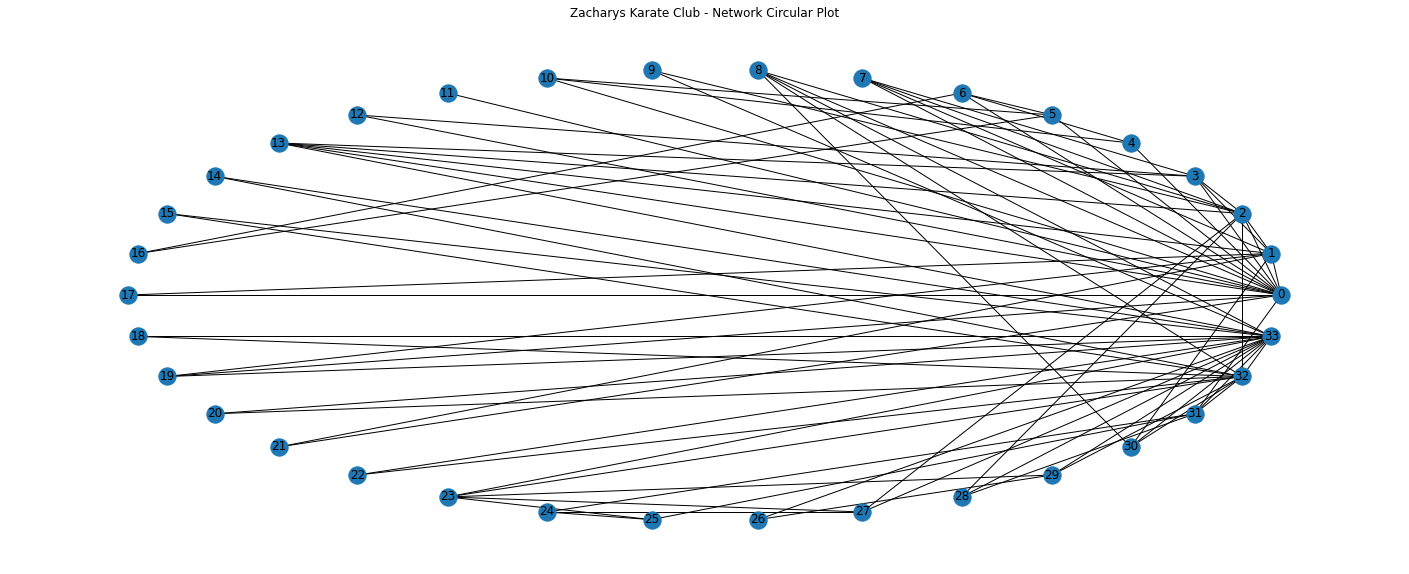

In [ ]:
plt.figure(figsize=(25,10))
ax = plt.gca()
ax.set_title('Zacharys Karate Club - Network Circular Plot')
nx.draw_circular(G,with_labels = True)

We can get a general sense that some nodes seem more connected to each other, for eample some of the nodes on the right have many more connections than most others.

**Networkx metrics**

Direction vs no Directions

NetworkX allows you to perform most analyses you might conceive, but you must understand the affordances of your dataset and realize some NetworkX algorithms are more appropriate than others.



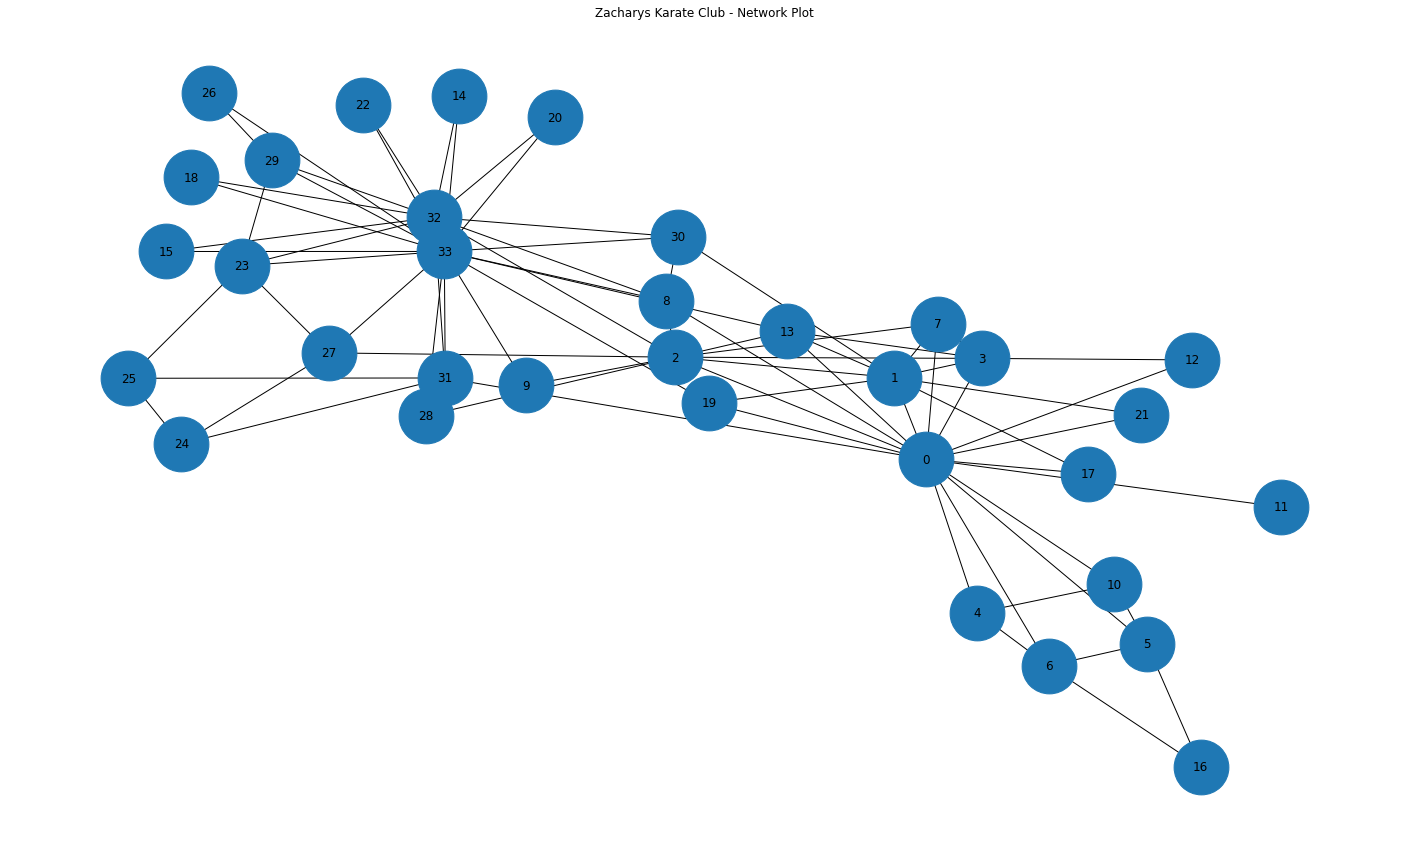

In [ ]:
plt.figure(figsize=(25,15))
ax = plt.gca()
ax.set_title('Zacharys Karate Club - Network Plot')
nx.draw(G,with_labels = True, node_size=3000)

We can see that all nodes are part of one big network. Knowing how many groups or components of a network can help us focus calculations on whats most useful.

We can also observe again some nodes seem more connected than others, e.g. node 0 and node 33. Lets highlight these and plot with a circular style.

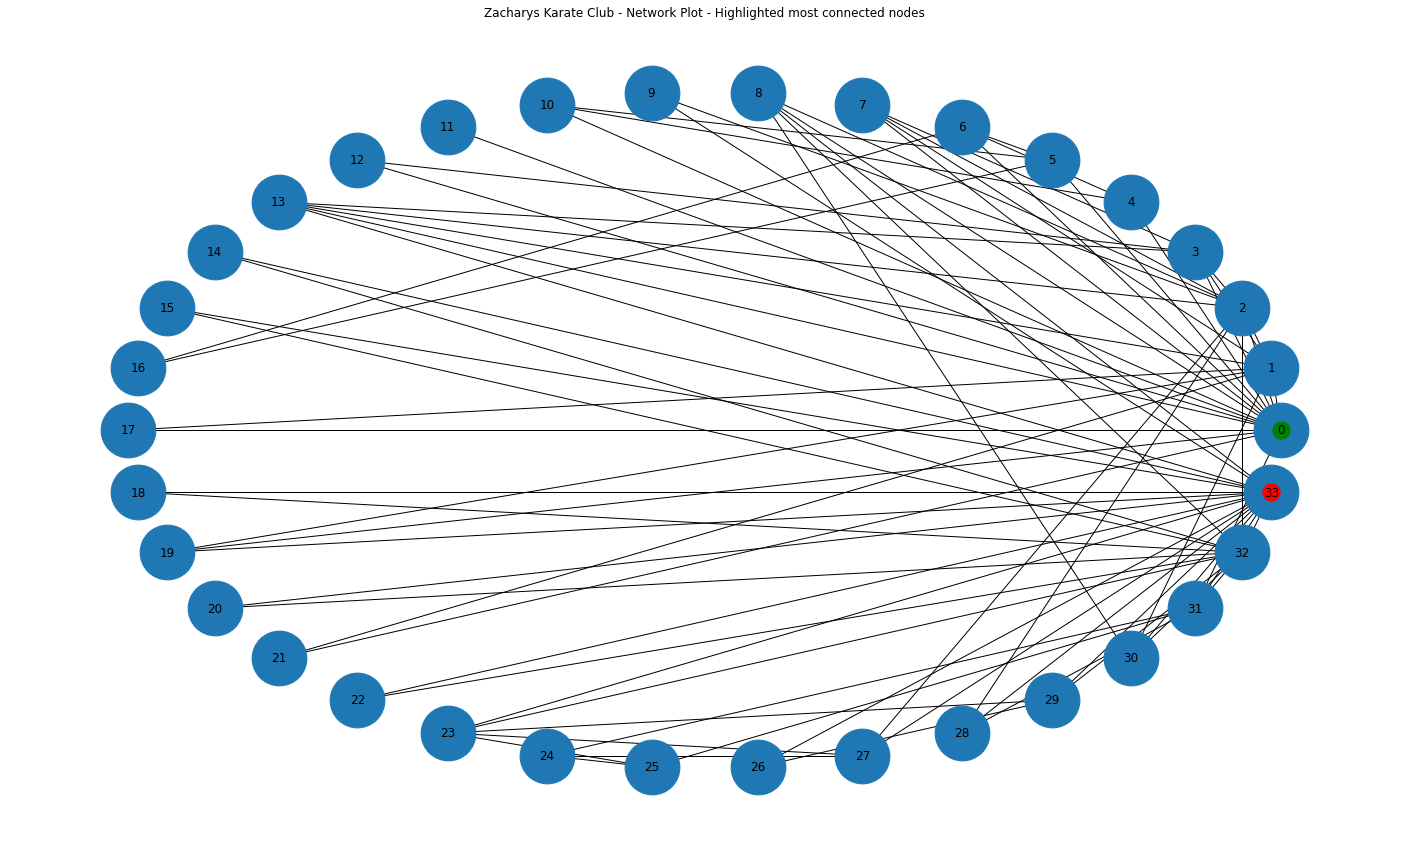

In [ ]:
plt.figure(figsize=(25,15))
ax = plt.gca()
ax.set_title('Zacharys Karate Club - Network Plot - Highlighted most connected nodes')

# To plot using networkx we first need to get the positions we want for each node. 
circ_pos = nx.circular_layout(G) 

# Use the networkx draw function to easily visualise the graph
nx.draw(G,circ_pos, with_labels = True, node_size=3000)

#let's highlight two of the most connected nodes 0 and 33
nx.draw_networkx_nodes(G, circ_pos, nodelist=[0], node_color='g', alpha=1)
nx.draw_networkx_nodes(G, circ_pos, nodelist=[33], node_color='r', alpha=1)

**Quantitative metrics**

1. Density

A good beggining metric is density which is a ratio of the actual edges in a network to all possible edges in a network. Density gives you a quick measure of how closely knit the network is.

In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.13903743315508021


The density value is 0.139, so this implies a not very dense network (on a scale from 0-1).

2. Diameter

Farthest of all conencted shortest paths

In [ ]:
print(nx.is_connected(G))
# Calculate diameter
diameter = nx.diameter(G)
print("Network diameter:", diameter)

True
Network diameter: 5


3. Transitivity

Transitivity expresses how interconnected a graph is in terms of a ratio of actual over possible connections.

In [ ]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.2556818181818182


4. Degree

Degree is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges. If a node has three lines extending from it to other nodes, its degree is three. Five edges, its degree is five

In [ ]:
from operator import itemgetter

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
(33, 17)
(0, 16)
(32, 12)
(2, 10)
(1, 9)
(3, 6)
(31, 6)
(8, 5)
(13, 5)
(23, 5)
(5, 4)
(6, 4)
(7, 4)
(27, 4)
(29, 4)
(30, 4)
(4, 3)
(10, 3)
(19, 3)
(24, 3)


But there exists more centrality measures.

Degree problem

Degree can tell you about the biggest hubs, but it can’t tell you that much about the rest of the nodes.




5. Other centrality measures



**Eigenvector centrality** is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly.



If you know a lot of well-connected people, you could spread a message very efficiently. If you’ve used Google, then you’re already somewhat familiar with Eigenvector centrality. Their PageRank algorithm uses an extension of this formula to decide which webpages get to the top of its search results.


**Betweenness centrality** is a bit different from the other two measures in that it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). To do this, it must first calculate every possible shortest path in your network, so keep in mind that betweenness centrality will take longer to calculate than other centrality measures (but it won’t be an issue in a dataset of this size). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. 


If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a hub, this sort of node is often referred to as a broker. Betweenness centrality is not the only way of finding brokerage (and other methods are more systematic), but it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion.


In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:20]:
    print(b)

Top 20 nodes by eigenvector centrality:
(33, 0.373371213013235)
(0, 0.3554834941851943)
(2, 0.31718938996844476)
(32, 0.3086510477336959)
(1, 0.2659538704545025)
(8, 0.2274050914716605)
(13, 0.22646969838808148)
(3, 0.2111740783205706)
(31, 0.19103626979791702)
(30, 0.17476027834493085)
(7, 0.17095511498035434)
(23, 0.15012328691726787)
(19, 0.14791134007618667)
(29, 0.13496528673866567)
(27, 0.13347932684333308)
(28, 0.13107925627221215)
(9, 0.10267519030637758)
(14, 0.10140627846270832)
(15, 0.10140627846270832)
(18, 0.10140627846270832)


In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
(0, 0.43763528138528146)
(33, 0.30407497594997596)
(32, 0.145247113997114)
(2, 0.14365680615680618)
(31, 0.13827561327561325)
(8, 0.05592682780182781)
(1, 0.053936688311688304)
(13, 0.04586339586339586)
(19, 0.03247504810004811)
(5, 0.02998737373737374)
(6, 0.029987373737373736)
(27, 0.02233345358345358)
(23, 0.017613636363636363)
(30, 0.014411976911976909)
(3, 0.011909271284271283)
(25, 0.0038404882154882154)
(29, 0.0029220779220779218)
(24, 0.0022095959595959595)
(28, 0.0017947330447330447)
(9, 0.0008477633477633478)


Interestingly, nodes 33 and 0 again come up top for betweeness centrality as well. Lets rank everyone and show betweeness, eigenvector and degree together.



In [ ]:
top_betweenness = sorted_betweenness[:20]
top_eigenvector = sorted_eigenvector[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Person:", tb[0], "| Betweenness Centrality:", tb[1], "| Eigenvector Centrality:", top_eigenvector[1], "| Degree:", degree)

Person: 0 | Betweenness Centrality: 0.43763528138528146 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 16
Person: 33 | Betweenness Centrality: 0.30407497594997596 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 17
Person: 32 | Betweenness Centrality: 0.145247113997114 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 12
Person: 2 | Betweenness Centrality: 0.14365680615680618 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 10
Person: 31 | Betweenness Centrality: 0.13827561327561325 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 6
Person: 8 | Betweenness Centrality: 0.05592682780182781 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 5
Person: 1 | Betweenness Centrality: 0.053936688311688304 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 9
Person: 13 | Betweenness Centrality: 0.04586339586339586 | Eigenvector Centrality: (0, 0.3554834941851943) | Degree: 5
Person: 19 | Betweenness Centrality: 0.0324750481

Centrality further reading

https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/#:~:text=Centrality%20measures%20are%20a%20vital,but%20they%20all%20work%20differently.

**-  First paper 1950**

Bavelas A (1950) Communication patterns in task oriented groups. J Acoust Soc Am 22:725–730


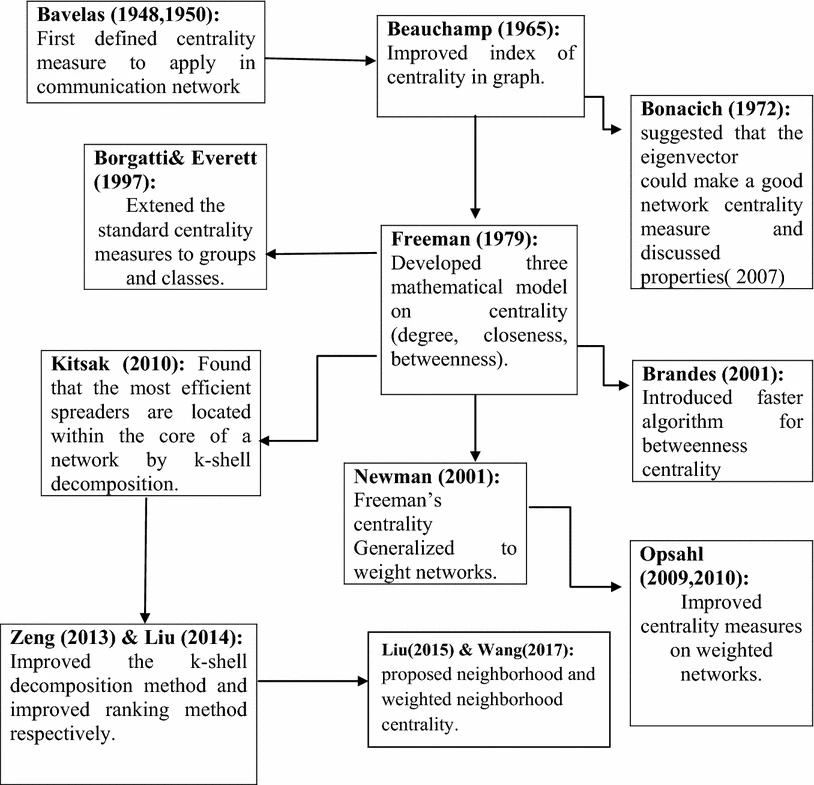

**Current advancements in centrality measures**




-  PathRank and Icentr

https://www.sciencedirect.com/science/article/pii/S0378437121008633


-  Biology

Protein-Protein interaction network, residue interaction and gene–gene interaction networks

https://www.ingentaconnect.com/content/ben/cbio/2014/00000009/00000004/art00007



- Finance

loan defaults, economic indicators

https://www.sciencedirect.com/science/article/pii/S0167715218300695





Used in many fields - biology, research, security, traffic, transportation, drug, class room
